# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [2]:
train_ds = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv')
test_ds = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')

train_ds.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### Meanings of abbreviations:

> TWF : tool wear failure

> HDF : heat dissipation failure  

> PWF : power failure

> OSF : overstrain failure 

> RNF : random failure 

In [3]:
test_ds.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [4]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

**Renaming Features**

In [5]:
def rename_col(df):
    df.rename(columns ={'Product ID':'Product_id',
                         'Air temperature [K]':'Air_temp',
                         'Process temperature [K]':'Process_temp',
                         'Rotational speed [rpm]':'Rotational_speed',
                         'Torque [Nm]':'Torque',
                         'Tool wear [min]':'Tool_wear',
                         'Machine failure':'Machine_failure'},inplace=True)
    return df

rename_col(train_ds)
rename_col(test_ds)

,id,Product_id,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


**Counting of Null Values in Dataset** 

In [6]:
def count_null_values(df):
    for i in df.columns:
        empty =df[i].isna().sum()
        print(f'Null values in column {i} are {empty}')
    print()
    
count_null_values(train_ds)
count_null_values(test_ds)

Null values in column id are 0
Null values in column Product_id are 0
Null values in column Type are 0
Null values in column Air_temp are 0
Null values in column Process_temp are 0
Null values in column Rotational_speed are 0
Null values in column Torque are 0
Null values in column Tool_wear are 0
Null values in column Machine_failure are 0
Null values in column TWF are 0
Null values in column HDF are 0
Null values in column PWF are 0
Null values in column OSF are 0
Null values in column RNF are 0

Null values in column id are 0
Null values in column Product_id are 0
Null values in column Type are 0
Null values in column Air_temp are 0
Null values in column Process_temp are 0
Null values in column Rotational_speed are 0
Null values in column Torque are 0
Null values in column Tool_wear are 0
Null values in column TWF are 0
Null values in column HDF are 0
Null values in column PWF are 0
Null values in column OSF are 0
Null values in column RNF are 0



In [7]:
# Variables
num = ['Air_temp', 'Process_temp','Rotational_speed', 'Torque', 'Tool_wear']
cat = ['Product_id', 'Type']
binary = ['TWF','HDF', 'PWF', 'OSF', 'RNF']

**Checking Unique values appeared in columns**

In [8]:
Machine_fail_values = train_ds['Machine_failure'].value_counts()
Type_col_values = test_ds['Type'].value_counts()
value_twf = train_ds['TWF'].value_counts()
value_hdf = train_ds['HDF'].value_counts()
value_rnf = train_ds['RNF'].value_counts()

print('Machine_failure:')
print(Machine_fail_values)
print('Type:')
print(Type_col_values)
print('TWF:')
print(value_twf)
print('HDF')
print(value_hdf)
print('RNF')
print(value_rnf)

Machine_failure:
0    134281
1      2148
Name: Machine_failure, dtype: int64
Type:
L    63438
M    21535
H     5981
Name: Type, dtype: int64
TWF:
0    136217
1       212
Name: TWF, dtype: int64
HDF
0    135725
1       704
Name: HDF, dtype: int64
RNF
0    136121
1       308
Name: RNF, dtype: int64


In [9]:
# storing id from test_ds for later
ids = test_ds['id']

# Removing ID, Product ID
drop_col = ['id','Product_id']
Type_dict = {'L':0,'M':1,'H':2}

def drop_columns(df):
    df.drop(drop_col,inplace=True,axis=1)
    return df

drop_columns(train_ds)
drop_columns(test_ds)

,Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,TWF,HDF,PWF,OSF,RNF
0,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
90949,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


# Data Visualization

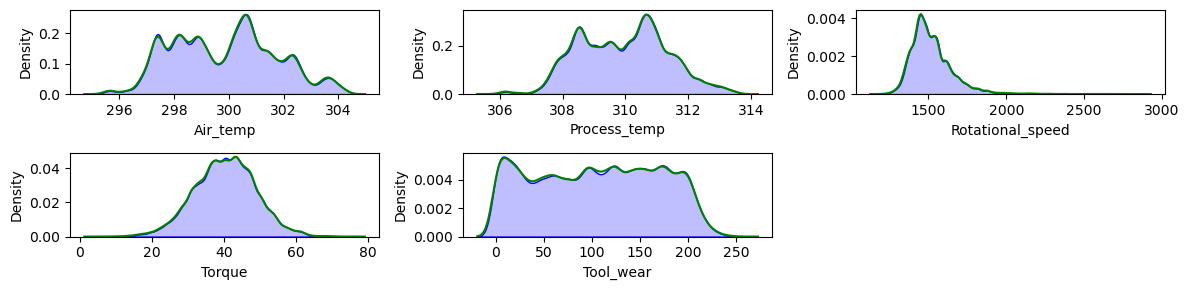

In [10]:
plt.figure(figsize=(12,3))
plt.subplots_adjust(hspace=0.5)
for i,col in enumerate(train_ds.drop(['Machine_failure','Type',*binary],axis=1)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data = train_ds ,x = col,color='blue',fill=True)
    sns.kdeplot(data = test_ds, x = col,color='green')

plt.tight_layout()
plt.show()

> Numerical columnns appears to be consistent in train_ds and test_ds

### Correlation Matrix

<Axes: >

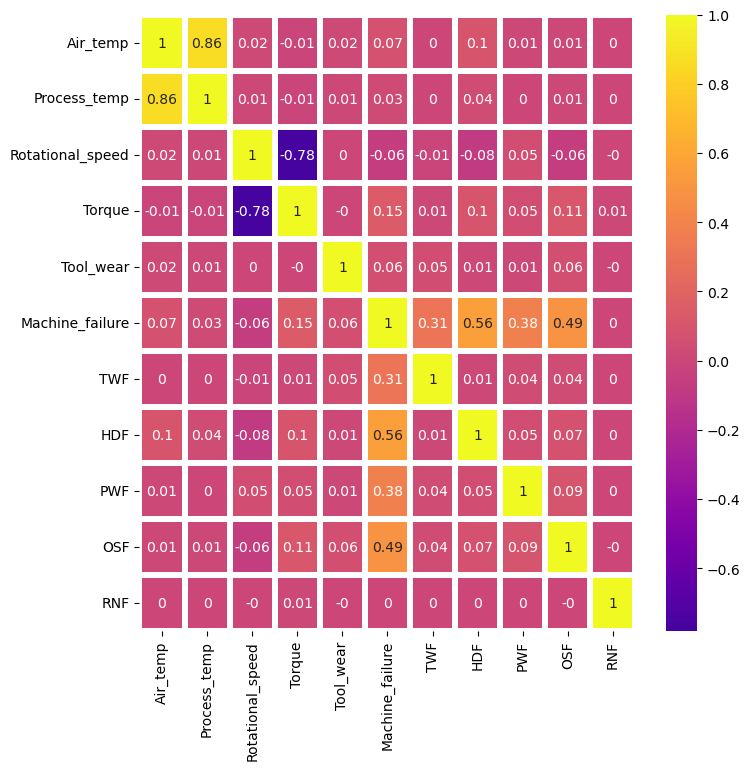

In [11]:
corr= train_ds.corr().round(2)

plt.figure(figsize=(8,8))
sns.heatmap(corr, center=0, annot=True,cmap='plasma', mask=False, linewidths=3)

* Torque and Roational_speed are negatively corelated
* Air_temp and Process_temp are positively corelated
* TWF,HDF,PWF,OSF are linearly correlated with Machine_failure
* Other features seems to be independant

**Relation of Type column with Machine_failure**

<Axes: xlabel='Type', ylabel='count'>

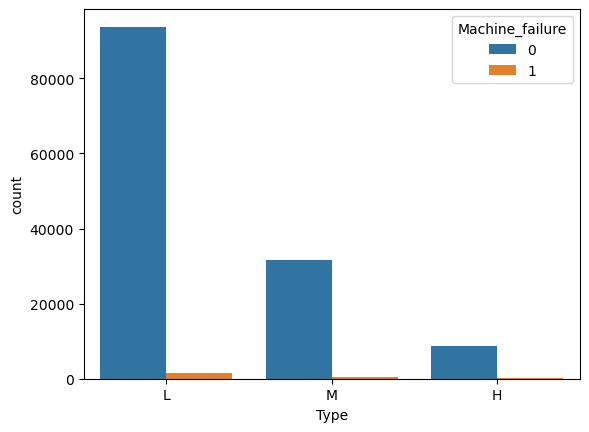

In [12]:
sns.countplot(data=train_ds,x='Type',hue='Machine_failure')

In [13]:
L_fail = train_ds[(train_ds['Type']=='L') & (train_ds['Machine_failure']==1)]
L_pass = train_ds[(train_ds['Type']=='L') & (train_ds['Machine_failure']==0)]
print(L_fail.shape[0]/L_pass.shape[0])

M_fail = train_ds[(train_ds['Type']=='M') & (train_ds['Machine_failure']==1)]
M_pass = train_ds[(train_ds['Type']=='M') & (train_ds['Machine_failure']==0)]
print(M_fail.shape[0]/M_pass.shape[0])

H_fail = train_ds[(train_ds['Type']=='H') & (train_ds['Machine_failure']==1)]
H_pass = train_ds[(train_ds['Type']=='H') & (train_ds['Machine_failure']==0)]
print(H_fail.shape[0]/H_pass.shape[0])

0.017011700210113164
0.013778968942140942
0.01317134097876689


Machine Failure appears to be independant of it's Type. Suggesting Type is Nominal varaible

### Type column Encoding

In [14]:
train_ds = pd.get_dummies(train_ds,columns=['Type'],drop_first=True)
test_ds = pd.get_dummies(test_ds,columns=['Type'],drop_first=True)
# Dropping first to avoid Dummy Variable trap

test_ds.head(2)

,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,302.3,311.5,1499,38.0,60,0,0,0,0,0,1,0
1,301.7,311.0,1713,28.8,17,0,0,0,0,0,1,0


**Adding 4 failure features**

In [15]:
def sum_col(df):
    df['sum_fail'] = df[['TWF', 'HDF', 'PWF', 'OSF']].sum(axis=1)
    df.drop(['TWF', 'HDF', 'PWF', 'OSF'],inplace=True,axis=1)
    return df
sum_col(train_ds)
sum_col(test_ds)

,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear,RNF,Type_L,Type_M,sum_fail
0,302.3,311.5,1499,38.0,60,0,1,0,0
1,301.7,311.0,1713,28.8,17,0,1,0,0
2,301.3,310.4,1525,37.7,96,0,1,0,0
3,300.1,309.6,1479,47.6,5,0,0,1,0
4,303.4,312.3,1515,41.3,114,0,0,1,0
...,...,...,...,...,...,...,...,...,...
90949,302.3,311.4,1484,40.4,15,0,1,0,0
90950,297.9,309.8,1542,33.8,31,0,1,0,0
90951,295.6,306.2,1501,41.4,187,0,1,0,0
90952,298.1,307.8,1534,40.3,69,0,1,0,0


### Train Test Split

In [16]:
y_train_temp = train_ds['Machine_failure']
x_train_temp = train_ds.drop('Machine_failure',axis=1)

x_train,x_test,y_train,y_test = train_test_split(x_train_temp,y_train_temp,random_state=0,test_size=0.25)

# Scaling the Train Data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Scaling Test Data

In [17]:
test_ds = sc.transform(test_ds)

# Model Selection

### Using Simple Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

DTC=DecisionTreeClassifier(random_state=0)
LR=LogisticRegression()
RFC=RandomForestClassifier(n_estimators=23,random_state=0)
KNN=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
NB=GaussianNB()

DTC.fit(x_train,y_train)
LR.fit(x_train,y_train)
RFC.fit(x_train,y_train)
KNN.fit(x_train,y_train)
NB.fit(x_train,y_train)

pred_DTC=DTC.predict_proba(x_test)
pred_DTC=[i[1] for i in pred_DTC]

pred_LR=LR.predict_proba(x_test)
pred_LR=[i[1] for i in pred_LR]

pred_RFC=RFC.predict_proba(x_test)
pred_RFC=[i[1] for i in pred_RFC]

pred_KNN=KNN.predict_proba(x_test)
pred_KNN=[i[1] for i in pred_KNN]

pred_NB=NB.predict_proba(x_test)
pred_NB=[i[1] for i in pred_NB]

In [19]:
print("Decision Tree Classification ROC score =",roc_auc_score(y_test,pred_DTC))
print("****************************************************************")
print("Logistic Regression ROC score =",roc_auc_score(y_test,pred_LR))
print("****************************************************************")
print("Random Forest Classification ROC score =",roc_auc_score(y_test,pred_RFC))
print("****************************************************************")
print("K Nearest Neighbors ROC score =",roc_auc_score(y_test,pred_KNN))
print("****************************************************************")
print("Naive Bayes ROC score =",roc_auc_score(y_test,pred_NB))

Decision Tree Classification ROC score = 0.896871854681282
****************************************************************
Logistic Regression ROC score = 0.9421318927978244
****************************************************************
Random Forest Classification ROC score = 0.9323250468816884
****************************************************************
K Nearest Neighbors ROC score = 0.9113631586219633
****************************************************************
Naive Bayes ROC score = 0.9498479714870276


### Using Ensemble Techniques

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

pred_GBC=GBC.predict_proba(x_test)
pred_GBC=[i[1] for i in pred_GBC]

print("Gradient Boosting ROC score =",roc_auc_score(y_test,pred_GBC))

Gradient Boosting ROC score = 0.9652207013731953


In [21]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(x_train,y_train)

pred_XGB=XGB.predict_proba(x_test)
pred_XGB=[i[1] for i in pred_XGB]

print("XGB ROC score =",roc_auc_score(y_test,pred_XGB))

XGB ROC score = 0.9664508068059703


In [22]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)

pred_ABC=ABC.predict_proba(x_test)
pred_ABC=[i[1] for i in pred_ABC]

print("AdaBoost ROC score =",roc_auc_score(y_test,pred_ABC))

AdaBoost ROC score = 0.9628287311679243


In [23]:
from catboost import CatBoostClassifier
CBC=CatBoostClassifier()
CBC.fit(x_train,y_train)

pred_CBC=CBC.predict_proba(x_test)
pred_CBC=[i[1] for i in pred_CBC]

print("CatBoost ROC score =",roc_auc_score(y_test,pred_CBC))

Learning rate set to 0.074334
0:	learn: 0.5027563	total: 93.9ms	remaining: 1m 33s
1:	learn: 0.3706055	total: 134ms	remaining: 1m 6s
2:	learn: 0.2736753	total: 159ms	remaining: 52.8s
3:	learn: 0.2057770	total: 183ms	remaining: 45.7s
4:	learn: 0.1562608	total: 206ms	remaining: 41s
5:	learn: 0.1221972	total: 227ms	remaining: 37.6s
6:	learn: 0.0972050	total: 248ms	remaining: 35.2s
7:	learn: 0.0787200	total: 270ms	remaining: 33.5s
8:	learn: 0.0660467	total: 319ms	remaining: 35.1s
9:	learn: 0.0561679	total: 371ms	remaining: 36.7s
10:	learn: 0.0490195	total: 411ms	remaining: 36.9s
11:	learn: 0.0435120	total: 432ms	remaining: 35.6s
12:	learn: 0.0392821	total: 453ms	remaining: 34.4s
13:	learn: 0.0359465	total: 474ms	remaining: 33.4s
14:	learn: 0.0332414	total: 496ms	remaining: 32.6s
15:	learn: 0.0311303	total: 519ms	remaining: 31.9s
16:	learn: 0.0296622	total: 542ms	remaining: 31.3s
17:	learn: 0.0282038	total: 564ms	remaining: 30.8s
18:	learn: 0.0271284	total: 585ms	remaining: 30.2s
19:	learn: 

In [24]:
from lightgbm import LGBMClassifier
LGB=LGBMClassifier()
LGB.fit(x_train,y_train)

pred_LGB=LGB.predict_proba(x_test)
pred_LGB=[i[1] for i in pred_LGB]

print("LightGBM ROC score =",roc_auc_score(y_test,pred_LGB))

LightGBM ROC score = 0.9638376069831287


**XGB scores the Highest ROC AUC score**

# Prediction

### Using Xtream Gradient Boost for final prediction

In [25]:
y_out = XGB.predict(test_ds)

**Saving output in a CSV File**

In [26]:
output = {'id':ids,
        'Machine failure':y_out}

output = pd.DataFrame(output)

output.to_csv('Machine_Failure_Competition.csv',index=False)